# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data


In [10]:
df_tesla = pd.read_csv('data/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('data/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('data/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('data/UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla


<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [11]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [12]:
df_tesla.shape

(124, 3)

In [13]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [14]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


### Unemployment Data

In [15]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [16]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


In [17]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [18]:
df_unemployment.shape

(181, 3)

### Bitcoin

In [19]:
df_btc_price.shape

(2204, 3)

In [20]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [21]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [22]:
df_btc_search.shape

(73, 2)

In [23]:
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [24]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

Finding any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [25]:
# df_btc_price.isna().values.any()
# True
# df_btc_search.isna().values.any()
# False
# df_tesla.isna().values.any()
# False
df_unemployment.isna().values.any()
# False

False

In [26]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [27]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [28]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


In [29]:
df_btc_price[df_btc_price.CLOSE.isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


Removing any missing values that you found. 

In [30]:
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

Checking the data type of the entries in the DataFrame MONTH or DATE columns and converting any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [31]:
# type(df_tesla.MONTH[1])
# str
# type(df_btc_search.MONTH[1])
# str
# type(df_unemployment.MONTH[1])
# str
type(df_btc_price.DATE[1])
# str

str

converting to datime objects

In [32]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [33]:
type(df_tesla.MONTH[1])
# Timestamp
# type(df_btc_search.MONTH[1])
# Timestamp
# type(df_unemployment.MONTH[1])
# Timestamp
# type(df_btc_price.DATE[1])
# Timestamp

pandas._libs.tslibs.timestamps.Timestamp

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [34]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [35]:
# the last available price in the month
df_btc_monthly = df_btc_price.resample("M", on="DATE").last()

If we wanted the average price over the course of the month

In [118]:
df_btc_monthly = df_btc_price.resample("M", on="DATE").mean()

In [36]:
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


In [37]:
df_btc_monthly.shape

(73, 2)

# Data Visualisation

### Notebook Formatting & Style Helpers

In [38]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

In [39]:
# registering date converters to avoid warinign message
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

Ploting the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. Adding colours to style the chart. This will help differentiate the two lines and the axis labels. Using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. You can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs). 

Make the chart larger and easier to read by:
1. Increasing the figure size (e.g., to 14 by 8). 
2. Increasing the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotating the text on the x-axis by 45 degrees. 
4. Making the lines on the chart thicker. 
5. Adding a title that reads 'Tesla Web Search vs Price'
6. Keeping the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Setting minimum and maximum values for the y and x axis. methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Using [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.
9. Adding tick formatting for dates on the x-axis.

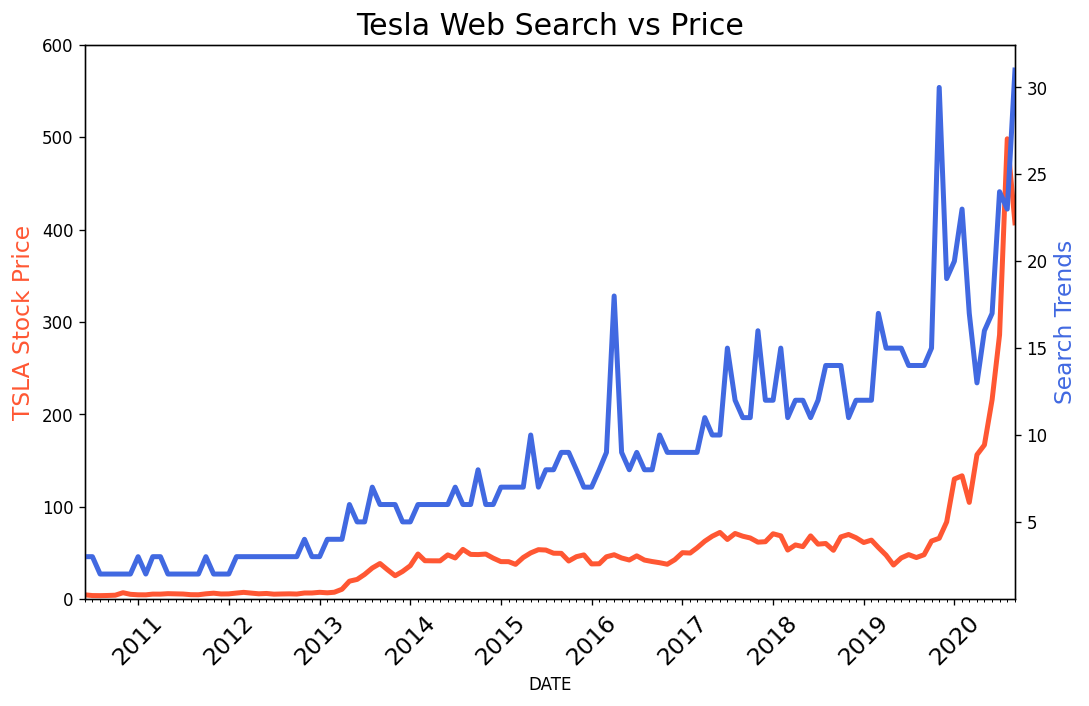

In [58]:
# configuring the chart
# increasing the size and resolution
plt.figure(figsize=(10,6), dpi=120)
# the title of the graph
plt.title("Tesla Web Search vs Price", fontsize=18)
# Increase the size adn rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

# getting the axis
ax1 = plt.gca()
# create another axis that share the same x-axis
ax2 = ax1.twinx()

# ploting different axis
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#FF5733', linewidth=3) # with a hex coed
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='royalblue', linewidth=3) # or a color name like in the docs

# labels
ax1.set_xlabel("DATE")
ax1.set_ylabel("TSLA Stock Price", color='#FF5733', fontsize=14)
ax2.set_ylabel("Search Trends", color='royalblue', fontsize=14)

# setting the min and max values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

# formating where the major and minor ticks should be
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Display all open figures.
plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

Creating the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modifing the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Changing the y-axis label to 'BTC Price' <br>
3. Changing the y- and x-axis limits to improve the appearance <br>
4. Investigating the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigating the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>

Big increases in searches for Bitcoin were accompanied by big increases in the price!

In [42]:
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


In [43]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


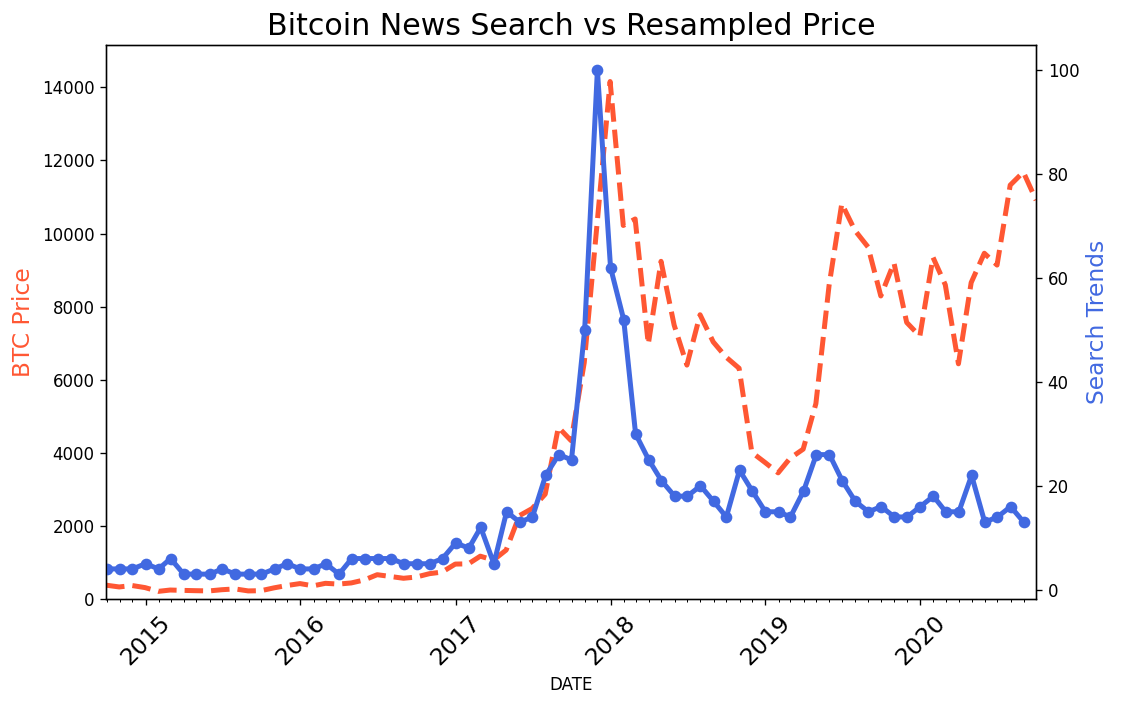

In [57]:
# configuring the chart
# increasing the size and resolution
plt.figure(figsize=(10,6), dpi=120)
# the title of the graph
plt.title("Bitcoin News Search vs Resampled Price", fontsize=18)
# Increase the size adn rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

# getting the axis
ax1 = plt.gca()
# create another axis that share the same x-axis
ax2 = ax1.twinx()

# ploting different axis
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, color='#FF5733', linewidth=3, linestyle='--') # with a hex coed
ax2.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, color='royalblue', linewidth=3, marker='o') # or a color name like in the docs

# labels
ax1.set_xlabel("DATE")
ax1.set_ylabel("BTC Price", color='#FF5733', fontsize=14)
ax2.set_ylabel("Search Trends", color='royalblue', fontsize=14)

# setting the min and max values on the axes
ax1.set_ylim([0, df_btc_monthly.CLOSE.max()+1000])
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])

# formating where the major and minor ticks should be
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Display all open figures.
plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

Plotting the search for "unemployment benefits" against the unemployment rate. 
1. Changing the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Changing the y-axis label to: FRED U/E Rate <br>
3. Changing the axis limits <br>
4. Adding a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

In [45]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


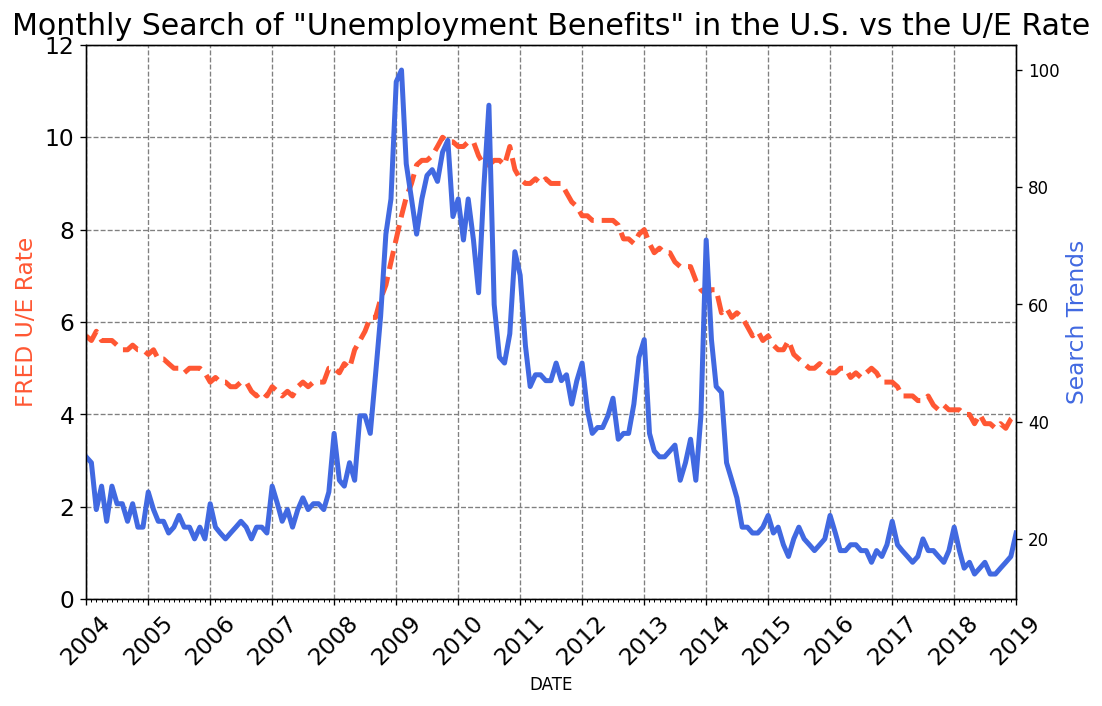

In [56]:
# configuring the chart
# increasing the size and resolution
plt.figure(figsize=(10,6), dpi=120)
# the title of the graph
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
# Increase the size adn rotate the labels on the x-axis
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

# getting the axis
ax1 = plt.gca()
# create another axis that share the same x-axis
ax2 = ax1.twinx()

# ploting different axis
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='#FF5733', linewidth=3, linestyle='--') # with a hex coed
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='royalblue', linewidth=3) # or a color name like in the docs

# labels
ax1.set_xlabel("DATE")
ax1.set_ylabel("FRED U/E Rate", color='#FF5733', fontsize=14)
ax2.set_ylabel("Search Trends", color='royalblue', fontsize=14)

# setting the min and max values on the axes
ax1.set_ylim([0, df_unemployment.UNRATE.max()+2])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# adding grey grid
ax1.grid(color='grey', linestyle='--')

# formating where the major and minor ticks should be
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Display all open figures.
plt.show()

Calculating the 3-month or 6-month rolling average for the web searches and ploting the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [59]:
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH','UNRATE']].rolling(window=6).mean()

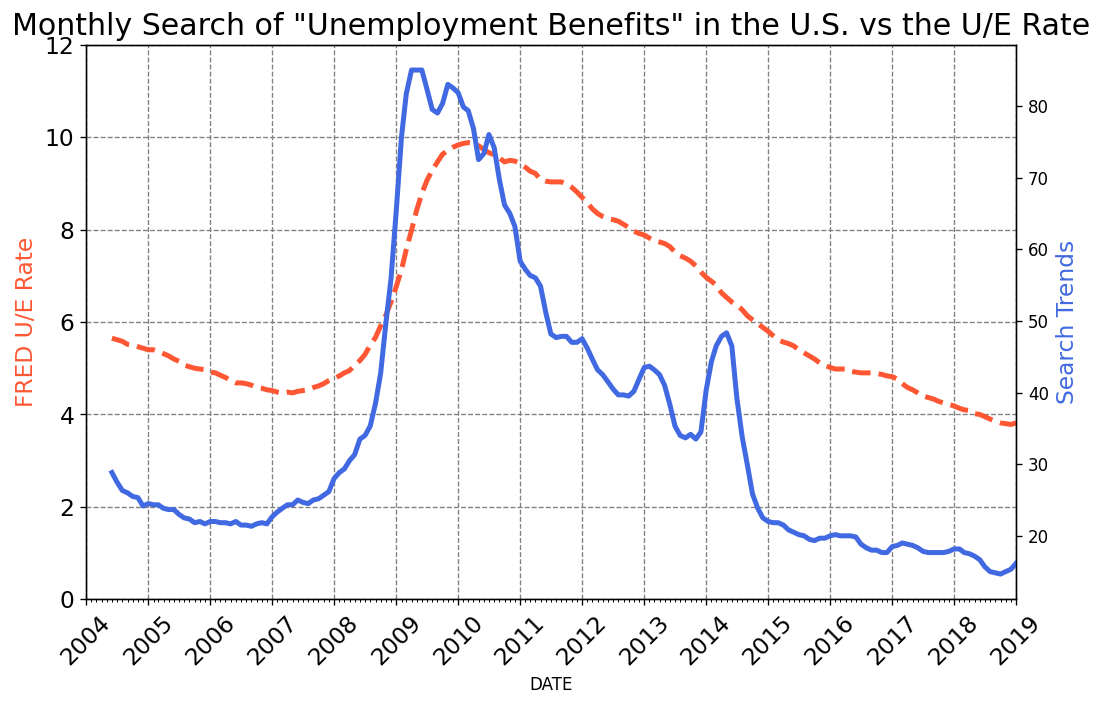

In [60]:
# configuring the chart
# increasing the size and resolution
plt.figure(figsize=(10,6), dpi=120)
# the title of the graph
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
# Increase the size adn rotate the labels on the x-axis
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

# getting the axis
ax1 = plt.gca()
# create another axis that share the same x-axis
ax2 = ax1.twinx()

# ploting different axis
ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, color='#FF5733', linewidth=3, linestyle='--') # with a hex coed
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color='royalblue', linewidth=3) # or a color name like in the docs

# labels
ax1.set_xlabel("DATE")
ax1.set_ylabel("FRED U/E Rate", color='#FF5733', fontsize=14)
ax2.set_ylabel("Search Trends", color='royalblue', fontsize=14)

# setting the min and max values on the axes
ax1.set_ylim([0, df_unemployment.UNRATE.max()+2])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# adding grey grid
ax1.grid(color='grey', linestyle='--')

# formating where the major and minor ticks should be
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Display all open figures.
plt.show()

### Including 2020 in Unemployment Charts

Reading the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Converting the MONTH column to Pandas Datetime objects and then plot the chart. 

In [49]:
df_unemployment_20 = pd.read_csv("data/UE Benefits Search vs UE Rate 2004-20.csv")
df_unemployment_20.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [50]:
type(df_unemployment_20.MONTH[1])

str

In [51]:
df_unemployment_20.MONTH = pd.to_datetime(df_unemployment_20.MONTH)
type(df_unemployment_20.MONTH[1])

pandas._libs.tslibs.timestamps.Timestamp

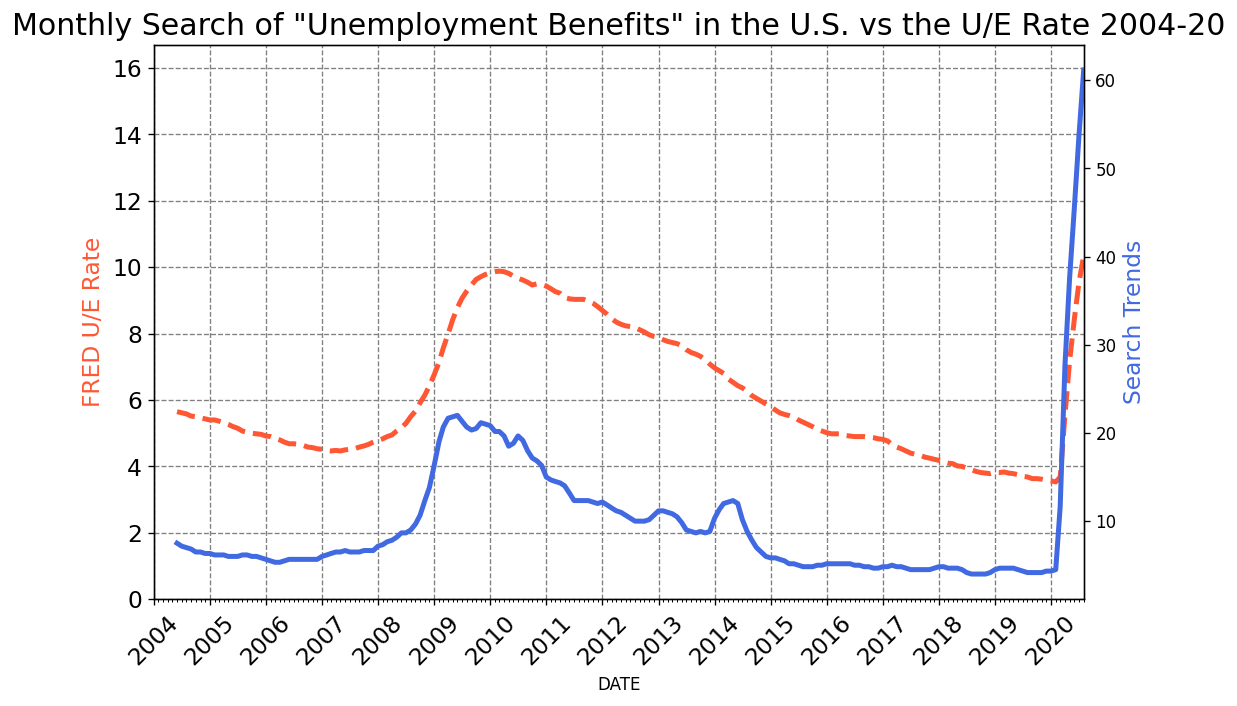

In [54]:
# configuring the chart
# increasing the size and resolution
plt.figure(figsize=(10,6), dpi=120)
# the title of the graph
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate 2004-20', fontsize=18)
# Increase the size adn rotate the labels on the x-axis
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

# getting the axis
ax1 = plt.gca()
# create another axis that share the same x-axis
ax2 = ax1.twinx()

# getting the rolling average
roll_df = df_unemployment_20[['UE_BENEFITS_WEB_SEARCH','UNRATE']].rolling(window=6).mean()

# ploting different axis
ax1.plot(df_unemployment_20.MONTH, roll_df.UNRATE, color='#FF5733', linewidth=3, linestyle='--') # with a hex coed
ax2.plot(df_unemployment_20.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color='royalblue', linewidth=3) # or a color name like in the docs

# labels
ax1.set_xlabel("DATE")
ax1.set_ylabel("FRED U/E Rate", color='#FF5733', fontsize=14)
ax2.set_ylabel("Search Trends", color='royalblue', fontsize=14)

# setting the min and max values on the axes
ax1.set_ylim([0, df_unemployment_20.UNRATE.max()+2])
ax1.set_xlim([df_unemployment_20.MONTH.min(), df_unemployment_20.MONTH.max()])

# adding grey grid
ax1.grid(color='grey', linestyle='--')

# formating where the major and minor ticks should be
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Display all open figures.
plt.show()